In [1]:
import numpy as np
import h5py
from sklearn.utils import shuffle
np.random.seed(2017)

X_train = []
X_test = []

In [2]:
filename = "D:/文件/Machine Learning/kaggle数据集/gap_VGG16.h5"

with h5py.File(filename,'r') as h:
    X_train.append(np.array(h["train"]))
    X_test.append(np.array(h["test"]))
    y_train = np.array(h["label"])

X_train = np.concatenate(X_train,axis=1)
X_test = np.concatenate(X_test,axis=1)

X_train,y_train = shuffle(X_train,y_train)

In [3]:
import tensorflow as tf

In [4]:
y_train = y_train.reshape(y_train.shape[0],1)

In [5]:
X = tf.placeholder(tf.float32,[None,X_train.shape[1]],name = 'X')
y = tf.placeholder(tf.float32,[None,y_train.shape[1]],name = 'y')

In [6]:
# build the model
def model(x):
    h1 = tf.layers.dense(x,128,activation=tf.nn.relu)
    h2 = tf.layers.dense(h1,64,activation=tf.nn.relu)
    logit = tf.layers.dense(x,1)
    out = tf.nn.sigmoid(logit)
    return logit,out

In [7]:
logit,y_ = model(X)
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y,logits=logit))

train = tf.train.AdamOptimizer(1e-5).minimize(loss)

In [8]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert inputs.shape[0] == targets.shape[0]
    if shuffle:
        indices = np.arange(inputs.shape[0])
        np.random.shuffle(indices)
    for start_idx in range(0, inputs.shape[0] - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    cost = []
    
    for e in range(100):
        for batch in iterate_minibatches(X_train,y_train,batchsize=128,shuffle=True):
            X_batch,y_batch = batch
            sess.run(train,feed_dict={X:X_batch,y:y_batch})
        
            loss_ = sess.run(loss,feed_dict={X:X_batch,y:y_batch})
            
        if e % 5 == 0:
            cost.append(loss_)
            print('loss: ',loss_)
    classification = sess.run(y_,feed_dict={X:X_test})
    

loss:  1.230861
loss:  0.8242398
loss:  0.7477151
loss:  0.5118121
loss:  0.24698664
loss:  0.35162014
loss:  0.28743434
loss:  0.2760066
loss:  0.18718821
loss:  0.25746027
loss:  0.10535043
loss:  0.17988344
loss:  0.16789982
loss:  0.1355131
loss:  0.15353546
loss:  0.20687614
loss:  0.10581845
loss:  0.12169994
loss:  0.113557816
loss:  0.11078204


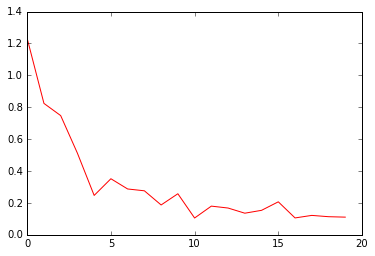

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(cost,'r-')
plt.show()

In [18]:
classification.shape

(12500, 1)

In [19]:
classification[1:10,:]

array([[1.2949235e-07],
       [4.6843791e-04],
       [1.0000000e+00],
       [1.0000000e+00],
       [3.0015858e-06],
       [1.3265879e-06],
       [9.9999940e-01],
       [9.9999988e-01],
       [2.4065177e-09]], dtype=float32)